Esse projeto tem como objetivo aplicar meus aprendizados de análise de dados com Python em um projeto de dados abertos referentes à segurança pública. 

Esse projeto busca possibilizar a visualização e entendimentos sobre as informações disponibilizadas. Eu criei algumas perguntas com base na base de dados onde me permitissem mostrar meus conhecimentos.

Será trabalhado com duas tabelas, a Ocorrências que possui as colunas UF, tipo de crime, ano, mês, ocorrência. A outra tabela é de vítimas, que possui os campos UF, tipo de crime, ano, mês, sexo da vitima e vítimas.

In [ ]:
#Primeiro importnado bibliotecas que serão utilizadas
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import statistics as sts
import seaborn as sns

In [ ]:

#trazendo a base de dados para o python
caminho='indicadoressegurancapublicauf.xlsx'
df=pd.ExcelFile(caminho)
df.sheet_names

In [ ]:
#trazendo a tabela ocorrências
ocorrencia = pd.read_excel(caminho, sheet_name=df.sheet_names[0])
ocorrencia.head()

In [ ]:
#trazendo a tabela vítimas
vitimas = pd.read_excel(caminho, sheet_name=df.sheet_names[1])
vitimas.head()

Na tabela vítimas existe no campo de sexo uma informação chamada "sexo NI", entrei em contato com o MJSP para entender que tipo de informação era essa, como até o momento não obtive resposta, apenas removerei as linhas que possuem essa informação para não afetar os resultados.

In [ ]:
vitimas = vitimas[vitimas['Sexo da Vítima'] != 'Sexo NI']
vitimas.head(20)

Agora fiz a verificação se existia mais alguma informação nula ou vazia em algum campos da tabela, como resultados vê-se que não

In [ ]:
vitimas.isnull().any()
ocorrencia.isnull().any()

Quando comecei a analisar as informações para excel, fiz algumas perguntas e percebi que podia fazer algumas análises para responder com a estatística básica.


1. Top 3 estados por crime no ano de 2022
2. Top 3 crimes por estado no ano de 2018
3. Quais violências atingem mais as mulheres?
4. Quais violências atingem mais os homens?
5. Qual mês mais violento por crime?
6. Qual mês mais violento por crime em cada estado?
7. Quais os crimes com maior frequência em cada ano?
8. Quais os crimes com maior frequência em cada ano no estado?


Como tenho duas tabelas com informações complementares e distintas, informarei qual tabela usarei para responder cada pergunta, para não misturar informações e acabar "sujando" a análise.






# Top 3 estados por crime no ano de 2022


Utilizarei a tabela ocorrência para análise das informações.
Comecei a filtrar o ano em que eu queria analisar.
Depois, agrupei pelo tipo de crime e estado, somando as ocorrências.
Por fim, usando um short, ordeno em forma decrescente a quantidade de ocorrências por estado, para verificar quais estados possuem maior frequência em cada crime.





In [ ]:
ocorrencia2022=ocorrencia[ocorrencia['Ano']==2022]
agrupado=ocorrencia2022.groupby(['Tipo Crime','UF']).agg({'Ocorrências': 'sum'}).reset_index()
top_3_estados_por_crime = agrupado.sort_values(['Tipo Crime', 'Ocorrências'], ascending=[True, False]).groupby('Tipo Crime').head(3)

print(top_3_estados_por_crime)

Para visualizar gráficamente dessa solução, dividi em duas opções, um gráfico geral, onde não achei que as informação são tem objetivas e a demonstração por categortia de crime, que atinge um objetivo melhor na visualiação do top 3.

In [ ]:
plt.figure(figsize=(12, 8))#define tamanho do grafico
for crime in top_3_estados_por_crime['Tipo Crime'].unique():
    subset = top_3_estados_por_crime[top_3_estados_por_crime['Tipo Crime'] == crime]#tipo de crime é o crime
    bars=plt.bar(subset['UF'] + ' - ' + crime, subset['Ocorrências'], label=crime)#combina o nome do estado com tipo de crime para ser feito a verificacao
    
    for bar, value in zip(bars, subset['Ocorrências']):#aqui adiciona os rótulos nas colunas
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(value), ha='center', va='bottom', fontsize=10)

plt.xlabel('UF - Tipo de Crime')
plt.ylabel('Ocorrências')
plt.title('Top 3 Estados por Crime em 2022')
plt.legend(title='Tipo de Crime')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
for crime in top_3_estados_por_crime['Tipo Crime'].unique():
    subset = top_3_estados_por_crime[top_3_estados_por_crime['Tipo Crime'] == crime]
    
    #plt.figure(figsize=(5, 8))
    bars = plt.bar(subset['UF'], subset['Ocorrências'], label=crime)
    
    # Adicionar os valores das Ocorrênciass nas barras
    for bar, value in zip(bars, subset['Ocorrências']):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(value), ha='center', va='bottom', fontsize=10)
    
    plt.xlabel('UF')
    plt.ylabel('Ocorrências')
    plt.title(f'Top 3 Estados por {crime} em 2022')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

Porém, se eu quisesse comprar todos os top 1 estados por crime, o gráfico geral tem utilidade, no entanto, como nosso foco é um top 3 crimes por estado em 2022, os gráficos individuais nos ajudam melhor.

# Top 3 crimes por estado no ano de 2018

Agora, verificarei de uma outra informação, verei quais os crimes mais praticados em cada estado no ano de 2018.

Seguindo particamente a mesma estrutura, no entanto, só desenvolvi os gráficos individuais para cada estado.


In [ ]:
ocorrencia2018=ocorrencia[ocorrencia['Ano']==2018]
agrupado=ocorrencia2022.groupby(['UF','Tipo Crime']).agg({'Ocorrências': 'sum'}).reset_index()
top_3_crime_por_estado = agrupado.sort_values(['UF', 'Ocorrências'], ascending=[True, False]).groupby('UF').head(3)

print(top_3_crime_por_estado)

In [ ]:
for estado in top_3_crime_por_estado['UF'].unique():
    subset = top_3_crime_por_estado[top_3_crime_por_estado['UF'] == estado]
    
    #plt.figure(figsize=(5, 8))
    bars = plt.bar(subset['Tipo Crime'], subset['Ocorrências'], label=estado)
    
    # Adicionar os valores das Ocorrênciass nas barras
    for bar, value in zip(bars, subset['Ocorrências']):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(value), ha='center', va='bottom', fontsize=10)
    
    plt.xlabel('Tipo Crime')
    plt.ylabel('Ocorrências')
    plt.title(f'Top 3 crimes em {estado} em 2022')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Quais violências atingem mais as mulheres?

Para essa analise, será necessário usar a tabela vitímas. Para demonstrar as quantidades usarei informações como, soma de todas as ocorrencias regitradas na base de dados, a média dessas informações, a mediana, porém, para disonibilizar graficamente, utilizarei a soma total, para que nenhuma manipulação ocorra no valor total.


In [ ]:
mulheres=vitimas[vitimas['Sexo da Vítima']=='Feminino']
soma=mulheres.Vítimas.sum()

A soma total de crimes cometidos contra mulheres é 31631, ou seja, minha análise não pode obter valores acima desse total.

In [ ]:
agrupado=mulheres.groupby('Tipo Crime').agg({'Vítimas': 'sum'}).reset_index()
mulheres_analise = agrupado.sort_values(['Tipo Crime','Vítimas'], ascending=[True, False]).groupby('Tipo Crime').head()
print(mulheres_analise)

Nessa base de dados, as informações registradas para mulheres são apenas três crimes, Homicídio doloso, Lesão corporal seguida de morte e Roubo seguido de morte (latrocínio), ou seja, apenas com essa analise podemos ver um alto nível de feminicídio, visto que todos crimes terminam em morte para as mulheres.

Agora expressado graficamente.

In [ ]:
plt.figure(figsize=(10, 8))
barras=plt.bar(mulheres_analise['Tipo Crime'], mulheres_analise['Vítimas'])
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2.0, altura, f'{altura}', ha='center', va='bottom')

plt.xlabel('Tipo Crime')
plt.ylabel('Vítimas')
plt.title('Crimes que mais afetaram as mulheres')
plt.xticks(rotation=0)
plt.show()

# Quais violências atingem mais os homens?

In [88]:
homens=vitimas[vitimas['Sexo da Vítima']=='Masculino']
soma=homens.Vítimas.sum()
print(soma)

340114


In [89]:
agrupado=homens.groupby('Tipo Crime').agg({'Vítimas': 'sum'}).reset_index()
homens_analise = agrupado.sort_values(['Tipo Crime','Vítimas'], ascending=[True, False]).groupby('Tipo Crime').head()
print(homens_analise)

                            Tipo Crime  Vítimas
0                     Homicídio doloso   323071
1      Lesão corporal seguida de morte     4993
2  Roubo seguido de morte (latrocínio)    12050


to espanatada que so cadastraram esse tipo de violencia na tebala vitimas

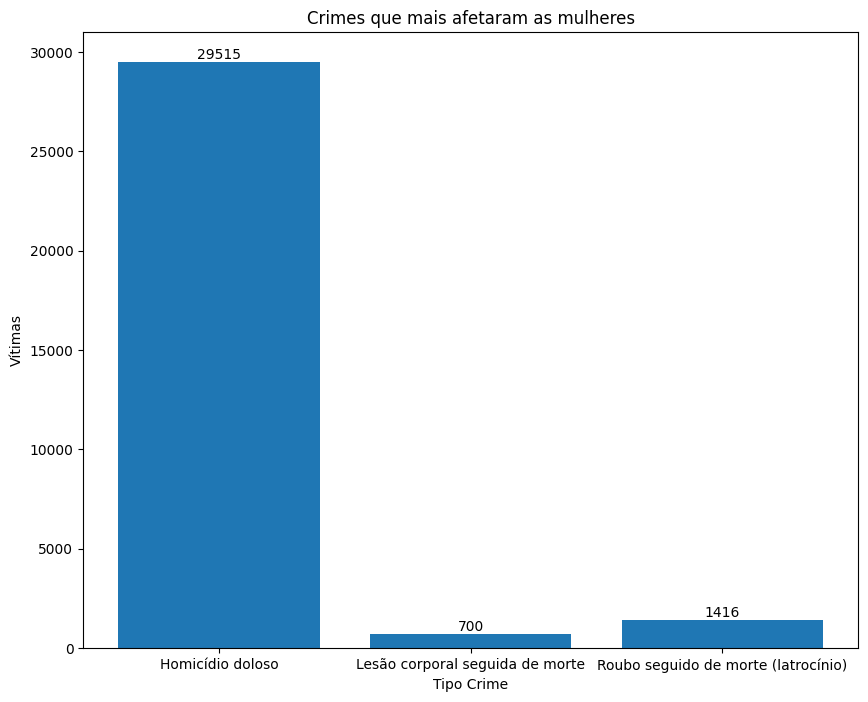

In [94]:
plt.figure(figsize=(10, 8))
barras=plt.bar(mulheres_analise['Tipo Crime'], mulheres_analise['Vítimas'])
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2.0, altura, f'{altura}', ha='center', va='bottom')

plt.xlabel('Tipo Crime')
plt.ylabel('Vítimas')
plt.title('Crimes que mais afetaram as mulheres')
plt.xticks(rotation=0)
plt.show()